#PhonePe Transaction Geo-Visualization
##Problem Statement:
You are provided with PhonePe's quarter wise transaction history pertaining to different categories of transaction. You're asked to develop a data frame & build a dashboard to visualize the transactions pertaining to each category in different locations.

##Approach:
Data frame construction from the provided quarterly transactional data
Classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering & Data Visualization. 

In [293]:
import json
import pandas as pd
import numpy as np

In [294]:
import plotly.express as px

In [295]:
with open('/content/india_states.geojson.txt') as f:
  India_states = json.load(f)

In [296]:
India_states["features"][0].keys()

dict_keys(['type', 'geometry', 'properties'])

In [297]:
India_states["features"][2]['properties']

{'ST_NM': 'Chandigarh'}

In [298]:
import pandas as pd
import json
from pandas import json_normalize

### PhonePe transaction data from Q1 2022

In [299]:
with open("1.json") as file:
  st = json.load(file)

In [300]:
st

{'success': True,
 'code': 'SUCCESS',
 'data': {'hoverDataList': [{'name': 'puducherry',
    'metric': [{'type': 'TOTAL',
      'count': 7359176,
      'amount': 12083474905.386654}]},
   {'name': 'tamil nadu',
    'metric': [{'type': 'TOTAL',
      'count': 294573150,
      'amount': 512789201600.61597}]},
   {'name': 'uttar pradesh',
    'metric': [{'type': 'TOTAL',
      'count': 473953246,
      'amount': 883123174117.039}]},
   {'name': 'madhya pradesh',
    'metric': [{'type': 'TOTAL',
      'count': 472703058,
      'amount': 747665139599.6421}]},
   {'name': 'andhra pradesh',
    'metric': [{'type': 'TOTAL',
      'count': 582603911,
      'amount': 1294320646554.8625}]},
   {'name': 'tripura',
    'metric': [{'type': 'TOTAL',
      'count': 2871190,
      'amount': 6247329764.349836}]},
   {'name': 'lakshadweep',
    'metric': [{'type': 'TOTAL',
      'count': 16397,
      'amount': 54939432.65393007}]},
   {'name': 'manipur',
    'metric': [{'type': 'TOTAL',
      'count': 53

In [301]:
st.pop("success")

True

In [302]:
st.pop("code")

'SUCCESS'

In [303]:
type(st)

dict

In [304]:
st.pop("responseTimestamp")

1651127571275

In [305]:
st["data"]

{'hoverDataList': [{'name': 'puducherry',
   'metric': [{'type': 'TOTAL',
     'count': 7359176,
     'amount': 12083474905.386654}]},
  {'name': 'tamil nadu',
   'metric': [{'type': 'TOTAL',
     'count': 294573150,
     'amount': 512789201600.61597}]},
  {'name': 'uttar pradesh',
   'metric': [{'type': 'TOTAL',
     'count': 473953246,
     'amount': 883123174117.039}]},
  {'name': 'madhya pradesh',
   'metric': [{'type': 'TOTAL',
     'count': 472703058,
     'amount': 747665139599.6421}]},
  {'name': 'andhra pradesh',
   'metric': [{'type': 'TOTAL',
     'count': 582603911,
     'amount': 1294320646554.8625}]},
  {'name': 'tripura',
   'metric': [{'type': 'TOTAL',
     'count': 2871190,
     'amount': 6247329764.349836}]},
  {'name': 'lakshadweep',
   'metric': [{'type': 'TOTAL', 'count': 16397, 'amount': 54939432.65393007}]},
  {'name': 'manipur',
   'metric': [{'type': 'TOTAL',
     'count': 5313679,
     'amount': 14144501078.373814}]},
  {'name': 'maharashtra',
   'metric': [{'

In [306]:
print(st["data"].get("hoverDataList"))

[{'name': 'puducherry', 'metric': [{'type': 'TOTAL', 'count': 7359176, 'amount': 12083474905.386654}]}, {'name': 'tamil nadu', 'metric': [{'type': 'TOTAL', 'count': 294573150, 'amount': 512789201600.61597}]}, {'name': 'uttar pradesh', 'metric': [{'type': 'TOTAL', 'count': 473953246, 'amount': 883123174117.039}]}, {'name': 'madhya pradesh', 'metric': [{'type': 'TOTAL', 'count': 472703058, 'amount': 747665139599.6421}]}, {'name': 'andhra pradesh', 'metric': [{'type': 'TOTAL', 'count': 582603911, 'amount': 1294320646554.8625}]}, {'name': 'tripura', 'metric': [{'type': 'TOTAL', 'count': 2871190, 'amount': 6247329764.349836}]}, {'name': 'lakshadweep', 'metric': [{'type': 'TOTAL', 'count': 16397, 'amount': 54939432.65393007}]}, {'name': 'manipur', 'metric': [{'type': 'TOTAL', 'count': 5313679, 'amount': 14144501078.373814}]}, {'name': 'maharashtra', 'metric': [{'type': 'TOTAL', 'count': 1169506438, 'amount': 1681399273981.1614}]}, {'name': 'dadra & nagar haveli & daman & diu', 'metric': [{'t

## Creating DataFrame for the data

In [307]:
States = pd.DataFrame(st["data"]["hoverDataList"])

In [308]:
States

name  \
0                           puducherry   
1                           tamil nadu   
2                        uttar pradesh   
3                       madhya pradesh   
4                       andhra pradesh   
5                              tripura   
6                          lakshadweep   
7                              manipur   
8                          maharashtra   
9   dadra & nagar haveli & daman & diu   
10                           meghalaya   
11           andaman & nicobar islands   
12                             haryana   
13                           rajasthan   
14                              ladakh   
15                              punjab   
16                               assam   
17                           jharkhand   
18                              odisha   
19                               bihar   
20                              kerala   
21                           karnataka   
22                          chandigarh   
23                           telangana   
24                    himachal pradesh   
25                         west bengal   
26                             gujarat   
27                              sikkim   
28                            nagaland   
29                             mizoram   
30                        chhattisgarh   
31                     jammu & kashmir   
32                                 goa   
33                   arunachal pradesh   
34                               delhi   
35                         uttarakhand   

                                               metric  
0   [{'type': 'TOTAL', 'count': 7359176, 'amount':...  
1   [{'type': 'TOTAL', 'count': 294573150, 'amount...  
2   [{'type': 'TOTAL', 'count': 473953246, 'amount...  
3   [{'type': 'TOTAL', 'count': 472703058, 'amount...  
4   [{'type': 'TOTAL', 'count': 582603911, 'amount...  
5   [{'type': 'TOTAL', 'count': 2871190, 'amount':...  
6   [{'type': 'TOTAL', 'count': 16397, 'amount': 5...  
7   [{'type': 'TOTAL', 'count': 5313679, 'amount':...  
8   [{'type': 'TOTAL', 'count': 1169506438, 'amoun...  
9   [{'type': 'TOTAL', 'count': 4802803, 'amount':...  
10  [{'type': 'TOTAL', 'count': 1674750, 'amount':...  
11  [{'type': 'TOTAL', 'count': 794748, 'amount': ...  
12  [{'type': 'TOTAL', 'count': 191988609, 'amount...  
13  [{'type': 'TOTAL', 'count': 564962220, 'amount...  
14  [{'type': 'TOTAL', 'count': 630015, 'amount': ...  
15  [{'type': 'TOTAL', 'count': 57758302, 'amount'...  
16  [{'type': 'TOTAL', 'count': 58889886, 'amount'...  
17  [{'type': 'TOTAL', 'count': 110911210, 'amount...  
18  [{'type': 'TOTAL', 'count': 263633499, 'amount...  
19  [{'type': 'TOTAL', 'count': 284390434, 'amount...  
20  [{'type': 'TOTAL', 'count': 95280965, 'amount'...  
21  [{'type': 'TOTAL', 'count': 1057855407, 'amoun...  
22  [{'type': 'TOTAL', 'count': 8600491, 'amount':...  
23  [{'type': 'TOTAL', 'count': 886453385, 'amount...  
24  [{'type': 'TOTAL', 'count': 16088180, 'amount'...  
25  [{'type': 'TOTAL', 'count': 260505092, 'amount...  
26  [{'type': 'TOTAL', 'count': 210547146, 'amount...  
27  [{'type': 'TOTAL', 'count': 1744302, 'amount':...  
28  [{'type': 'TOTAL', 'count': 1925952, 'amount':...  
29  [{'type': 'TOTAL', 'count': 604917, 'amount': ...  
30  [{'type': 'TOTAL', 'count': 97413292, 'amount'...  
31  [{'type': 'TOTAL', 'count': 16245311, 'amount'...  
32  [{'type': 'TOTAL', 'count': 12214098, 'amount'...  
33  [{'type': 'TOTAL', 'count': 2804068, 'amount':...  
34  [{'type': 'TOTAL', 'count': 330999861, 'amount...  
35  [{'type': 'TOTAL', 'count': 44560772, 'amount'...

In [309]:
counts = States["metric"].tolist()

In [310]:
counts

[[{'type': 'TOTAL', 'count': 7359176, 'amount': 12083474905.386654}],
 [{'type': 'TOTAL', 'count': 294573150, 'amount': 512789201600.61597}],
 [{'type': 'TOTAL', 'count': 473953246, 'amount': 883123174117.039}],
 [{'type': 'TOTAL', 'count': 472703058, 'amount': 747665139599.6421}],
 [{'type': 'TOTAL', 'count': 582603911, 'amount': 1294320646554.8625}],
 [{'type': 'TOTAL', 'count': 2871190, 'amount': 6247329764.349836}],
 [{'type': 'TOTAL', 'count': 16397, 'amount': 54939432.65393007}],
 [{'type': 'TOTAL', 'count': 5313679, 'amount': 14144501078.373814}],
 [{'type': 'TOTAL', 'count': 1169506438, 'amount': 1681399273981.1614}],
 [{'type': 'TOTAL', 'count': 4802803, 'amount': 6237048367.262389}],
 [{'type': 'TOTAL', 'count': 1674750, 'amount': 4662338331.33188}],
 [{'type': 'TOTAL', 'count': 794748, 'amount': 2129030202.0751667}],
 [{'type': 'TOTAL', 'count': 191988609, 'amount': 341304042652.78125}],
 [{'type': 'TOTAL', 'count': 564962220, 'amount': 1022050180980.1362}],
 [{'type': 'TOTA

In [311]:
ccc = pd.DataFrame.from_dict(counts, orient='columns')

In [312]:
ccc

0
0   {'type': 'TOTAL', 'count': 7359176, 'amount': ...
1   {'type': 'TOTAL', 'count': 294573150, 'amount'...
2   {'type': 'TOTAL', 'count': 473953246, 'amount'...
3   {'type': 'TOTAL', 'count': 472703058, 'amount'...
4   {'type': 'TOTAL', 'count': 582603911, 'amount'...
5   {'type': 'TOTAL', 'count': 2871190, 'amount': ...
6   {'type': 'TOTAL', 'count': 16397, 'amount': 54...
7   {'type': 'TOTAL', 'count': 5313679, 'amount': ...
8   {'type': 'TOTAL', 'count': 1169506438, 'amount...
9   {'type': 'TOTAL', 'count': 4802803, 'amount': ...
10  {'type': 'TOTAL', 'count': 1674750, 'amount': ...
11  {'type': 'TOTAL', 'count': 794748, 'amount': 2...
12  {'type': 'TOTAL', 'count': 191988609, 'amount'...
13  {'type': 'TOTAL', 'count': 564962220, 'amount'...
14  {'type': 'TOTAL', 'count': 630015, 'amount': 2...
15  {'type': 'TOTAL', 'count': 57758302, 'amount':...
16  {'type': 'TOTAL', 'count': 58889886, 'amount':...
17  {'type': 'TOTAL', 'count': 110911210, 'amount'...
18  {'type': 'TOTAL', 'count': 263633499, 'amount'...
19  {'type': 'TOTAL', 'count': 284390434, 'amount'...
20  {'type': 'TOTAL', 'count': 95280965, 'amount':...
21  {'type': 'TOTAL', 'count': 1057855407, 'amount...
22  {'type': 'TOTAL', 'count': 8600491, 'amount': ...
23  {'type': 'TOTAL', 'count': 886453385, 'amount'...
24  {'type': 'TOTAL', 'count': 16088180, 'amount':...
25  {'type': 'TOTAL', 'count': 260505092, 'amount'...
26  {'type': 'TOTAL', 'count': 210547146, 'amount'...
27  {'type': 'TOTAL', 'count': 1744302, 'amount': ...
28  {'type': 'TOTAL', 'count': 1925952, 'amount': ...
29  {'type': 'TOTAL', 'count': 604917, 'amount': 1...
30  {'type': 'TOTAL', 'count': 97413292, 'amount':...
31  {'type': 'TOTAL', 'count': 16245311, 'amount':...
32  {'type': 'TOTAL', 'count': 12214098, 'amount':...
33  {'type': 'TOTAL', 'count': 2804068, 'amount': ...
34  {'type': 'TOTAL', 'count': 330999861, 'amount'...
35  {'type': 'TOTAL', 'count': 44560772, 'amount':...

In [313]:
ccddd = ccc.join(pd.DataFrame(ccc.pop(0).values.tolist()))

In [314]:
ccddd

type       count        amount
0   TOTAL     7359176  1.208347e+10
1   TOTAL   294573150  5.127892e+11
2   TOTAL   473953246  8.831232e+11
3   TOTAL   472703058  7.476651e+11
4   TOTAL   582603911  1.294321e+12
5   TOTAL     2871190  6.247330e+09
6   TOTAL       16397  5.493943e+07
7   TOTAL     5313679  1.414450e+10
8   TOTAL  1169506438  1.681399e+12
9   TOTAL     4802803  6.237048e+09
10  TOTAL     1674750  4.662338e+09
11  TOTAL      794748  2.129030e+09
12  TOTAL   191988609  3.413040e+11
13  TOTAL   564962220  1.022050e+12
14  TOTAL      630015  2.025041e+09
15  TOTAL    57758302  1.183900e+11
16  TOTAL    58889886  1.322804e+11
17  TOTAL   110911210  1.947002e+11
18  TOTAL   263633499  4.512273e+11
19  TOTAL   284390434  6.114117e+11
20  TOTAL    95280965  1.399889e+11
21  TOTAL  1057855407  1.566649e+12
22  TOTAL     8600491  1.517499e+10
23  TOTAL   886453385  1.670638e+12
24  TOTAL    16088180  2.651845e+10
25  TOTAL   260505092  5.514267e+11
26  TOTAL   210547146  3.925481e+11
27  TOTAL     1744302  4.367431e+09
28  TOTAL     1925952  5.544952e+09
29  TOTAL      604917  1.945159e+09
30  TOTAL    97413292  1.578470e+11
31  TOTAL    16245311  3.314786e+10
32  TOTAL    12214098  1.981645e+10
33  TOTAL     2804068  7.828092e+09
34  TOTAL   330999861  5.369649e+11
35  TOTAL    44560772  7.097878e+10

In [315]:
result = pd.concat([States, ccddd], axis=1, join='inner')
display(result)

name  \
0                           puducherry   
1                           tamil nadu   
2                        uttar pradesh   
3                       madhya pradesh   
4                       andhra pradesh   
5                              tripura   
6                          lakshadweep   
7                              manipur   
8                          maharashtra   
9   dadra & nagar haveli & daman & diu   
10                           meghalaya   
11           andaman & nicobar islands   
12                             haryana   
13                           rajasthan   
14                              ladakh   
15                              punjab   
16                               assam   
17                           jharkhand   
18                              odisha   
19                               bihar   
20                              kerala   
21                           karnataka   
22                          chandigarh   
23                           telangana   
24                    himachal pradesh   
25                         west bengal   
26                             gujarat   
27                              sikkim   
28                            nagaland   
29                             mizoram   
30                        chhattisgarh   
31                     jammu & kashmir   
32                                 goa   
33                   arunachal pradesh   
34                               delhi   
35                         uttarakhand   

                                               metric   type       count  \
0   [{'type': 'TOTAL', 'count': 7359176, 'amount':...  TOTAL     7359176   
1   [{'type': 'TOTAL', 'count': 294573150, 'amount...  TOTAL   294573150   
2   [{'type': 'TOTAL', 'count': 473953246, 'amount...  TOTAL   473953246   
3   [{'type': 'TOTAL', 'count': 472703058, 'amount...  TOTAL   472703058   
4   [{'type': 'TOTAL', 'count': 582603911, 'amount...  TOTAL   582603911   
5   [{'type': 'TOTAL', 'count': 2871190, 'amount':...  TOTAL     2871190   
6   [{'type': 'TOTAL', 'count': 16397, 'amount': 5...  TOTAL       16397   
7   [{'type': 'TOTAL', 'count': 5313679, 'amount':...  TOTAL     5313679   
8   [{'type': 'TOTAL', 'count': 1169506438, 'amoun...  TOTAL  1169506438   
9   [{'type': 'TOTAL', 'count': 4802803, 'amount':...  TOTAL     4802803   
10  [{'type': 'TOTAL', 'count': 1674750, 'amount':...  TOTAL     1674750   
11  [{'type': 'TOTAL', 'count': 794748, 'amount': ...  TOTAL      794748   
12  [{'type': 'TOTAL', 'count': 191988609, 'amount...  TOTAL   191988609   
13  [{'type': 'TOTAL', 'count': 564962220, 'amount...  TOTAL   564962220   
14  [{'type': 'TOTAL', 'count': 630015, 'amount': ...  TOTAL      630015   
15  [{'type': 'TOTAL', 'count': 57758302, 'amount'...  TOTAL    57758302   
16  [{'type': 'TOTAL', 'count': 58889886, 'amount'...  TOTAL    58889886   
17  [{'type': 'TOTAL', 'count': 110911210, 'amount...  TOTAL   110911210   
18  [{'type': 'TOTAL', 'count': 263633499, 'amount...  TOTAL   263633499   
19  [{'type': 'TOTAL', 'count': 284390434, 'amount...  TOTAL   284390434   
20  [{'type': 'TOTAL', 'count': 95280965, 'amount'...  TOTAL    95280965   
21  [{'type': 'TOTAL', 'count': 1057855407, 'amoun...  TOTAL  1057855407   
22  [{'type': 'TOTAL', 'count': 8600491, 'amount':...  TOTAL     8600491   
23  [{'type': 'TOTAL', 'count': 886453385, 'amount...  TOTAL   886453385   
24  [{'type': 'TOTAL', 'count': 16088180, 'amount'...  TOTAL    16088180   
25  [{'type': 'TOTAL', 'count': 260505092, 'amount...  TOTAL   260505092   
26  [{'type': 'TOTAL', 'count': 210547146, 'amount...  TOTAL   210547146   
27  [{'type': 'TOTAL', 'count': 1744302, 'amount':...  TOTAL     1744302   
28  [{'type': 'TOTAL', 'count': 1925952, 'amount':...  TOTAL     1925952   
29  [{'type': 'TOTAL', 'count': 604917, 'amount': ...  TOTAL      604917   
30  [{'type': 'TOTAL', 'count': 97413292, 'amount'...  TOTAL    97413292   
31  [{'type': 'TOTAL', 'count': 16245311, 'amou

In [316]:
result['name'] = result['name'].replace(['andaman & nicobar islands','andhra pradesh','arunachal pradesh','assam','bihar','chandigarh','chhattisgarh','dadra & nagar haveli & daman & diu','delhi','goa','gujarat','haryana','himachal pradesh','jammu & kashmir','jharkhand','karnataka','kerala','ladakh','lakshadweep','madhya pradesh', 'maharashtra', 'manipur', 'meghalaya','mizoram','nagaland', 'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'telangana', 'tripura','uttar pradesh', 'uttarakhand', 'west bengal'],['Andaman and Nicobar','Andhra Pradesh','Arunachal Pradesh','Assam','Bihar','Chandigarh','Chhattisgarh','Dadra and Nagar Haveli','Delhi','Goa','Gujarat','Haryana','Himachal Pradesh','Jammu & Kashmir','Jharkhand','Karnataka','Kerala','Ladakh','Lakshadweep','Madhya Pradesh','Maharashtra','Manipur','Meghalaya','Mizoram','Nagaland','Odisha','Puducherry','Punjab','Rajasthan','Sikkim','Tamil Nadu','Telangana','Tripura','Uttar Pradesh','Uttaranchal','West Bengal'])

In [317]:
result = result.drop(['metric'],axis = 1)
result

name   type       count        amount
0               Puducherry  TOTAL     7359176  1.208347e+10
1               Tamil Nadu  TOTAL   294573150  5.127892e+11
2            Uttar Pradesh  TOTAL   473953246  8.831232e+11
3           Madhya Pradesh  TOTAL   472703058  7.476651e+11
4           Andhra Pradesh  TOTAL   582603911  1.294321e+12
5                  Tripura  TOTAL     2871190  6.247330e+09
6              Lakshadweep  TOTAL       16397  5.493943e+07
7                  Manipur  TOTAL     5313679  1.414450e+10
8              Maharashtra  TOTAL  1169506438  1.681399e+12
9   Dadra and Nagar Haveli  TOTAL     4802803  6.237048e+09
10               Meghalaya  TOTAL     1674750  4.662338e+09
11     Andaman and Nicobar  TOTAL      794748  2.129030e+09
12                 Haryana  TOTAL   191988609  3.413040e+11
13               Rajasthan  TOTAL   564962220  1.022050e+12
14                  Ladakh  TOTAL      630015  2.025041e+09
15                  Punjab  TOTAL    57758302  1.183900e+11
16                   Assam  TOTAL    58889886  1.322804e+11
17               Jharkhand  TOTAL   110911210  1.947002e+11
18                  Odisha  TOTAL   263633499  4.512273e+11
19                   Bihar  TOTAL   284390434  6.114117e+11
20                  Kerala  TOTAL    95280965  1.399889e+11
21               Karnataka  TOTAL  1057855407  1.566649e+12
22              Chandigarh  TOTAL     8600491  1.517499e+10
23               Telangana  TOTAL   886453385  1.670638e+12
24        Himachal Pradesh  TOTAL    16088180  2.651845e+10
25             West Bengal  TOTAL   260505092  5.514267e+11
26                 Gujarat  TOTAL   210547146  3.925481e+11
27                  Sikkim  TOTAL     1744302  4.367431e+09
28                Nagaland  TOTAL     1925952  5.544952e+09
29                 Mizoram  TOTAL      604917  1.945159e+09
30            Chhattisgarh  TOTAL    97413292  1.578470e+11
31         Jammu & Kashmir  TOTAL    16245311  3.314786e+10
32                     Goa  TOTAL    12214098  1.981645e+10
33       Arunachal Pradesh  TOTAL     2804068  7.828092e+09
34                   Delhi  TOTAL   330999861  5.369649e+11
35             Uttaranchal  TOTAL    44560772  7.097878e+10

##Data Visualization - Map

In [318]:
fig = px.choropleth(result, geojson=India_states, featureidkey='properties.ST_NM',   
             locations='name',        
              color= 'count',  
              color_continuous_scale='spectral',
               title='PhonePe transactions count in Q1 2022 across the states (in Billions)',  
               height=700,
               projection="mercator"
               )

fig.update_geos(fitbounds="locations", visible=False)

fig.show()

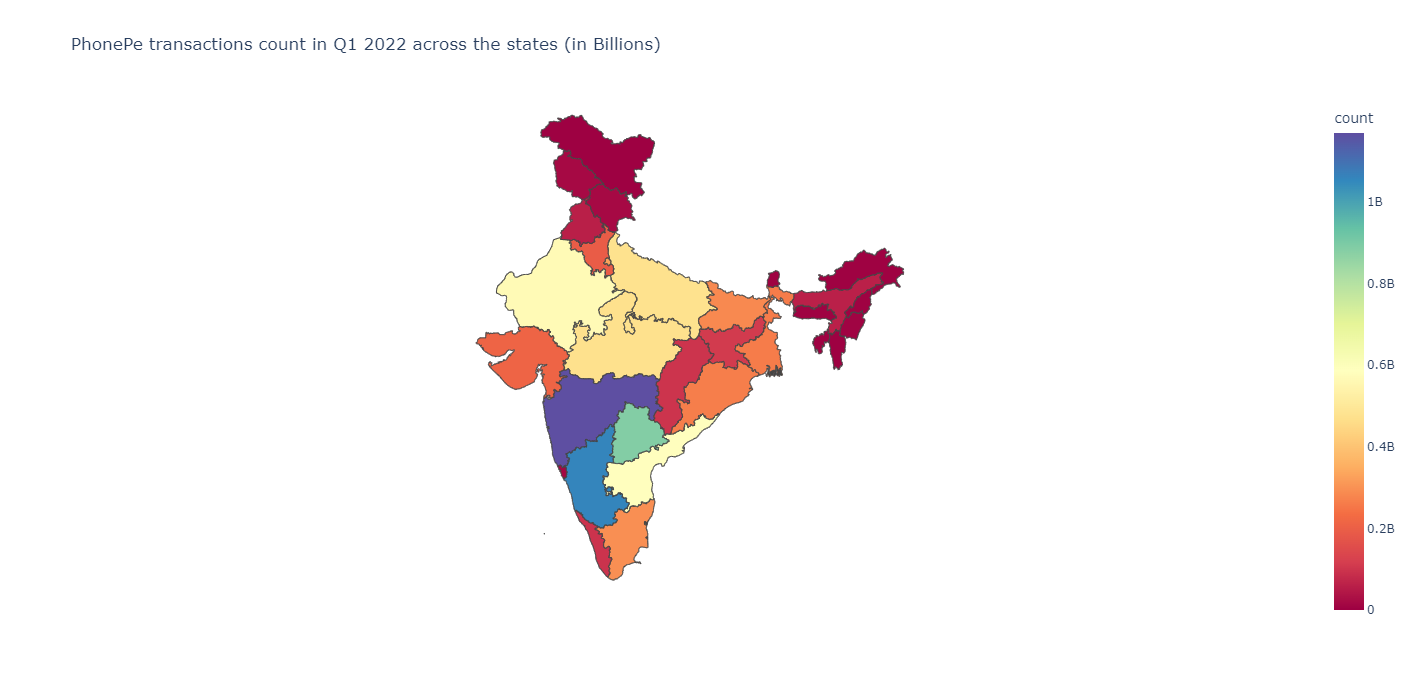

## Maharashtra state ranks 1st with 1.169 Billion transactions while Mizoram ranks last with 604.9 thousand transactions

In [319]:
fig = px.choropleth(result, geojson=India_states, featureidkey='properties.ST_NM',   
             locations='name',        
              color= 'amount',  
              color_continuous_scale='viridis',
               title='PhonePe transaction amount in Q1 2022 across the states (in Trillions)',  
               height=700,
               projection="mercator"
               )

fig.update_geos(fitbounds="locations", visible=False)

fig.show()

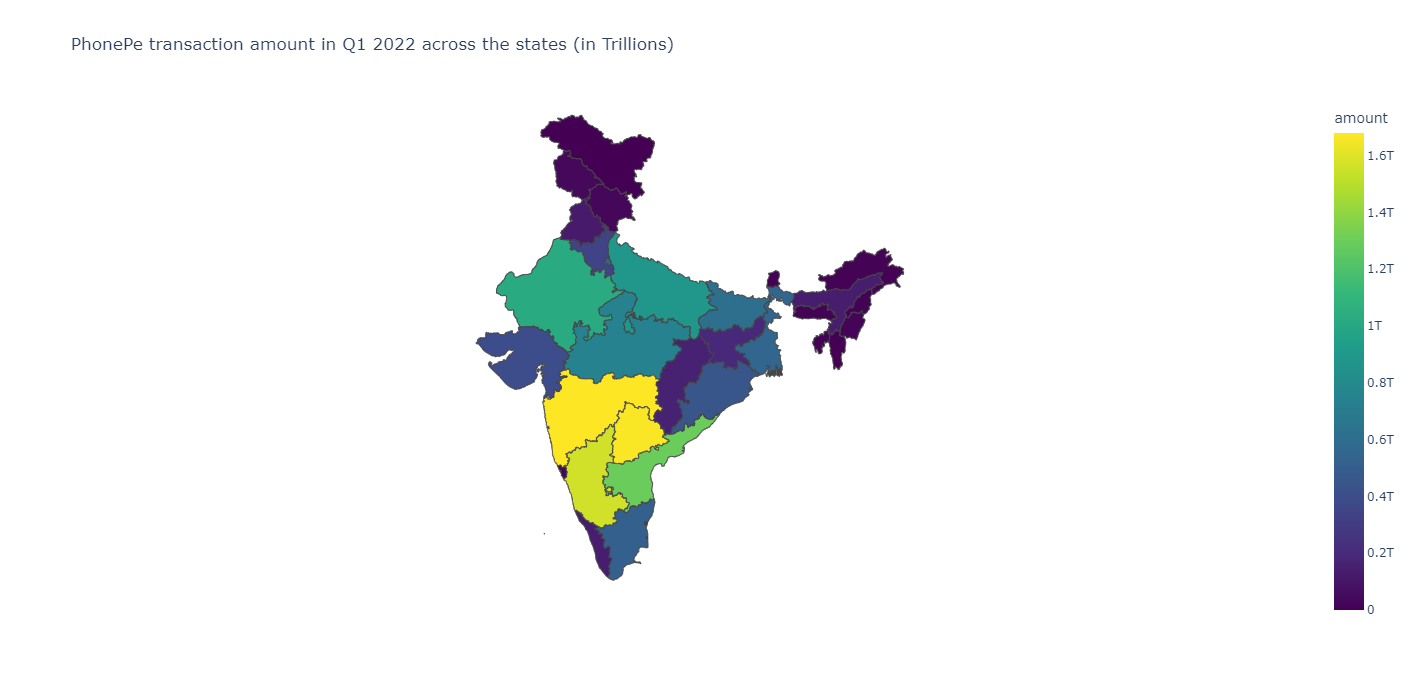

## Maharashtra state ranks 1st with 1.68 Trillion transaction amount while Mizoram ranks last with 1.94 Billion transaction amount

In [320]:
import json
import pandas as pd
import numpy as np
import plotly.express as px

In [321]:
with open('/content/india_states.geojson.txt') as f1:
  India_states1 = json.load(f1)

In [322]:
India_states1["features"][2]['properties']

{'ST_NM': 'Chandigarh'}

## PhonePe transaction data from Q1 2018

In [323]:
with open("2018_1.json") as file1:
  st1 = json.load(file1)

In [324]:
st1

{'success': True,
 'code': 'SUCCESS',
 'data': {'hoverDataList': [{'name': 'puducherry',
    'metric': [{'type': 'TOTAL',
      'count': 104212,
      'amount': 165825971.36983618}]},
   {'name': 'tamil nadu',
    'metric': [{'type': 'TOTAL',
      'count': 6726622,
      'amount': 11261557697.516891}]},
   {'name': 'uttar pradesh',
    'metric': [{'type': 'TOTAL',
      'count': 12537805,
      'amount': 13939970923.223106}]},
   {'name': 'madhya pradesh',
    'metric': [{'type': 'TOTAL',
      'count': 8025395,
      'amount': 8681603403.446348}]},
   {'name': 'andhra pradesh',
    'metric': [{'type': 'TOTAL',
      'count': 9039585,
      'amount': 11996276391.823706}]},
   {'name': 'tripura',
    'metric': [{'type': 'TOTAL',
      'count': 148157,
      'amount': 137978914.53062224}]},
   {'name': 'lakshadweep',
    'metric': [{'type': 'TOTAL', 'count': 778, 'amount': 1928611.1808777403}]},
   {'name': 'manipur',
    'metric': [{'type': 'TOTAL',
      'count': 84069,
      'amount'

In [325]:
st1.pop("success")

True

In [326]:
st1.pop("code")

'SUCCESS'

In [327]:
st1.pop("responseTimestamp")

1630502909426

In [328]:
st1["data"]

{'hoverDataList': [{'name': 'puducherry',
   'metric': [{'type': 'TOTAL',
     'count': 104212,
     'amount': 165825971.36983618}]},
  {'name': 'tamil nadu',
   'metric': [{'type': 'TOTAL',
     'count': 6726622,
     'amount': 11261557697.516891}]},
  {'name': 'uttar pradesh',
   'metric': [{'type': 'TOTAL',
     'count': 12537805,
     'amount': 13939970923.223106}]},
  {'name': 'madhya pradesh',
   'metric': [{'type': 'TOTAL',
     'count': 8025395,
     'amount': 8681603403.446348}]},
  {'name': 'andhra pradesh',
   'metric': [{'type': 'TOTAL',
     'count': 9039585,
     'amount': 11996276391.823706}]},
  {'name': 'tripura',
   'metric': [{'type': 'TOTAL',
     'count': 148157,
     'amount': 137978914.53062224}]},
  {'name': 'lakshadweep',
   'metric': [{'type': 'TOTAL', 'count': 778, 'amount': 1928611.1808777403}]},
  {'name': 'manipur',
   'metric': [{'type': 'TOTAL',
     'count': 84069,
     'amount': 128046173.93020926}]},
  {'name': 'maharashtra',
   'metric': [{'type': 'T

In [329]:
print(st1["data"].get("hoverDataList"))

[{'name': 'puducherry', 'metric': [{'type': 'TOTAL', 'count': 104212, 'amount': 165825971.36983618}]}, {'name': 'tamil nadu', 'metric': [{'type': 'TOTAL', 'count': 6726622, 'amount': 11261557697.516891}]}, {'name': 'uttar pradesh', 'metric': [{'type': 'TOTAL', 'count': 12537805, 'amount': 13939970923.223106}]}, {'name': 'madhya pradesh', 'metric': [{'type': 'TOTAL', 'count': 8025395, 'amount': 8681603403.446348}]}, {'name': 'andhra pradesh', 'metric': [{'type': 'TOTAL', 'count': 9039585, 'amount': 11996276391.823706}]}, {'name': 'tripura', 'metric': [{'type': 'TOTAL', 'count': 148157, 'amount': 137978914.53062224}]}, {'name': 'lakshadweep', 'metric': [{'type': 'TOTAL', 'count': 778, 'amount': 1928611.1808777403}]}, {'name': 'manipur', 'metric': [{'type': 'TOTAL', 'count': 84069, 'amount': 128046173.93020926}]}, {'name': 'maharashtra', 'metric': [{'type': 'TOTAL', 'count': 16387034, 'amount': 21711613257.725674}]}, {'name': 'dadra & nagar haveli & daman & diu', 'metric': [{'type': 'TOTA

##Creating DataFrame for the data

In [330]:
States1 = pd.DataFrame(st1["data"]["hoverDataList"])

In [331]:
States1

name  \
0                           puducherry   
1                           tamil nadu   
2                        uttar pradesh   
3                       madhya pradesh   
4                       andhra pradesh   
5                              tripura   
6                          lakshadweep   
7                              manipur   
8                          maharashtra   
9   dadra & nagar haveli & daman & diu   
10                           meghalaya   
11           andaman & nicobar islands   
12                             haryana   
13                           rajasthan   
14                              ladakh   
15                              punjab   
16                               assam   
17                           jharkhand   
18                              odisha   
19                               bihar   
20                              kerala   
21                           karnataka   
22                          chandigarh   
23                           telangana   
24                    himachal pradesh   
25                         west bengal   
26                             gujarat   
27                              sikkim   
28                            nagaland   
29                             mizoram   
30                        chhattisgarh   
31                     jammu & kashmir   
32                                 goa   
33                   arunachal pradesh   
34                               delhi   
35                         uttarakhand   

                                               metric  
0   [{'type': 'TOTAL', 'count': 104212, 'amount': ...  
1   [{'type': 'TOTAL', 'count': 6726622, 'amount':...  
2   [{'type': 'TOTAL', 'count': 12537805, 'amount'...  
3   [{'type': 'TOTAL', 'count': 8025395, 'amount':...  
4   [{'type': 'TOTAL', 'count': 9039585, 'amount':...  
5   [{'type': 'TOTAL', 'count': 148157, 'amount': ...  
6   [{'type': 'TOTAL', 'count': 778, 'amount': 192...  
7   [{'type': 'TOTAL', 'count': 84069, 'amount': 1...  
8   [{'type': 'TOTAL', 'count': 16387034, 'amount'...  
9   [{'type': 'TOTAL', 'count': 148549, 'amount': ...  
10  [{'type': 'TOTAL', 'count': 49571, 'amount': 6...  
11  [{'type': 'TOTAL', 'count': 6658, 'amount': 14...  
12  [{'type': 'TOTAL', 'count': 4480770, 'amount':...  
13  [{'type': 'TOTAL', 'count': 7591690, 'amount':...  
14  [{'type': 'TOTAL', 'count': 6089, 'amount': 12...  
15  [{'type': 'TOTAL', 'count': 1870433, 'amount':...  
16  [{'type': 'TOTAL', 'count': 1056881, 'amount':...  
17  [{'type': 'TOTAL', 'count': 2178921, 'amount':...  
18  [{'type': 'TOTAL', 'count': 5809821, 'amount':...  
19  [{'type': 'TOTAL', 'count': 5824302, 'amount':...  
20  [{'type': 'TOTAL', 'count': 1771380, 'amount':...  
21  [{'type': 'TOTAL', 'count': 12016899, 'amount'...  
22  [{'type': 'TOTAL', 'count': 381895, 'amount': ...  
23  [{'type': 'TOTAL', 'count': 8522766, 'amount':...  
24  [{'type': 'TOTAL', 'count': 481918, 'amount': ...  
25  [{'type': 'TOTAL', 'count': 11710225, 'amount'...  
26  [{'type': 'TOTAL', 'count': 5948775, 'amount':...  
27  [{'type': 'TOTAL', 'count': 44078, 'amount': 6...  
28  [{'type': 'TOTAL', 'count': 42845, 'amount': 7...  
29  [{'type': 'TOTAL', 'count': 18561, 'amount': 4...  
30  [{'type': 'TOTAL', 'count': 1891514, 'amount':...  
31  [{'type': 'TOTAL', 'count': 941568, 'amount': ...  
32  [{'type': 'TOTAL', 'count': 160897, 'amount': ...  
33  [{'type': 'TOTAL', 'count': 45497, 'amount': 9...  
34  [{'type': 'TOTAL', 'count': 7122754, 'amount':...  
35  [{'type': 'TOTAL', 'count': 1246685, 'amount':...

In [332]:
counts1 = States1["metric"].tolist()

In [333]:
counts1

[[{'type': 'TOTAL', 'count': 104212, 'amount': 165825971.36983618}],
 [{'type': 'TOTAL', 'count': 6726622, 'amount': 11261557697.516891}],
 [{'type': 'TOTAL', 'count': 12537805, 'amount': 13939970923.223106}],
 [{'type': 'TOTAL', 'count': 8025395, 'amount': 8681603403.446348}],
 [{'type': 'TOTAL', 'count': 9039585, 'amount': 11996276391.823706}],
 [{'type': 'TOTAL', 'count': 148157, 'amount': 137978914.53062224}],
 [{'type': 'TOTAL', 'count': 778, 'amount': 1928611.1808777403}],
 [{'type': 'TOTAL', 'count': 84069, 'amount': 128046173.93020926}],
 [{'type': 'TOTAL', 'count': 16387034, 'amount': 21711613257.725674}],
 [{'type': 'TOTAL', 'count': 148549, 'amount': 175658384.10921687}],
 [{'type': 'TOTAL', 'count': 49571, 'amount': 66250259.78990036}],
 [{'type': 'TOTAL', 'count': 6658, 'amount': 14631761.22198579}],
 [{'type': 'TOTAL', 'count': 4480770, 'amount': 6793511514.660528}],
 [{'type': 'TOTAL', 'count': 7591690, 'amount': 8926293130.726837}],
 [{'type': 'TOTAL', 'count': 6089, 'a

In [334]:
ccc1 = pd.DataFrame.from_dict(counts1, orient='columns')

In [335]:
ccc1

0
0   {'type': 'TOTAL', 'count': 104212, 'amount': 1...
1   {'type': 'TOTAL', 'count': 6726622, 'amount': ...
2   {'type': 'TOTAL', 'count': 12537805, 'amount':...
3   {'type': 'TOTAL', 'count': 8025395, 'amount': ...
4   {'type': 'TOTAL', 'count': 9039585, 'amount': ...
5   {'type': 'TOTAL', 'count': 148157, 'amount': 1...
6   {'type': 'TOTAL', 'count': 778, 'amount': 1928...
7   {'type': 'TOTAL', 'count': 84069, 'amount': 12...
8   {'type': 'TOTAL', 'count': 16387034, 'amount':...
9   {'type': 'TOTAL', 'count': 148549, 'amount': 1...
10  {'type': 'TOTAL', 'count': 49571, 'amount': 66...
11  {'type': 'TOTAL', 'count': 6658, 'amount': 146...
12  {'type': 'TOTAL', 'count': 4480770, 'amount': ...
13  {'type': 'TOTAL', 'count': 7591690, 'amount': ...
14  {'type': 'TOTAL', 'count': 6089, 'amount': 125...
15  {'type': 'TOTAL', 'count': 1870433, 'amount': ...
16  {'type': 'TOTAL', 'count': 1056881, 'amount': ...
17  {'type': 'TOTAL', 'count': 2178921, 'amount': ...
18  {'type': 'TOTAL', 'count': 5809821, 'amount': ...
19  {'type': 'TOTAL', 'count': 5824302, 'amount': ...
20  {'type': 'TOTAL', 'count': 1771380, 'amount': ...
21  {'type': 'TOTAL', 'count': 12016899, 'amount':...
22  {'type': 'TOTAL', 'count': 381895, 'amount': 6...
23  {'type': 'TOTAL', 'count': 8522766, 'amount': ...
24  {'type': 'TOTAL', 'count': 481918, 'amount': 6...
25  {'type': 'TOTAL', 'count': 11710225, 'amount':...
26  {'type': 'TOTAL', 'count': 5948775, 'amount': ...
27  {'type': 'TOTAL', 'count': 44078, 'amount': 64...
28  {'type': 'TOTAL', 'count': 42845, 'amount': 78...
29  {'type': 'TOTAL', 'count': 18561, 'amount': 45...
30  {'type': 'TOTAL', 'count': 1891514, 'amount': ...
31  {'type': 'TOTAL', 'count': 941568, 'amount': 1...
32  {'type': 'TOTAL', 'count': 160897, 'amount': 3...
33  {'type': 'TOTAL', 'count': 45497, 'amount': 92...
34  {'type': 'TOTAL', 'count': 7122754, 'amount': ...
35  {'type': 'TOTAL', 'count': 1246685, 'amount': ...

In [336]:
ccddd1 = ccc1.join(pd.DataFrame(ccc1.pop(0).values.tolist()))

In [337]:
ccddd1

type     count        amount
0   TOTAL    104212  1.658260e+08
1   TOTAL   6726622  1.126156e+10
2   TOTAL  12537805  1.393997e+10
3   TOTAL   8025395  8.681603e+09
4   TOTAL   9039585  1.199628e+10
5   TOTAL    148157  1.379789e+08
6   TOTAL       778  1.928611e+06
7   TOTAL     84069  1.280462e+08
8   TOTAL  16387034  2.171161e+10
9   TOTAL    148549  1.756584e+08
10  TOTAL     49571  6.625026e+07
11  TOTAL      6658  1.463176e+07
12  TOTAL   4480770  6.793512e+09
13  TOTAL   7591690  8.926293e+09
14  TOTAL      6089  1.253286e+07
15  TOTAL   1870433  2.780758e+09
16  TOTAL   1056881  1.157804e+09
17  TOTAL   2178921  2.374186e+09
18  TOTAL   5809821  4.627632e+09
19  TOTAL   5824302  6.045758e+09
20  TOTAL   1771380  2.402675e+09
21  TOTAL  12016899  1.921790e+10
22  TOTAL    381895  6.134354e+08
23  TOTAL   8522766  1.330820e+10
24  TOTAL    481918  6.287378e+08
25  TOTAL  11710225  1.062598e+10
26  TOTAL   5948775  7.577982e+09
27  TOTAL     44078  6.465094e+07
28  TOTAL     42845  7.800589e+07
29  TOTAL     18561  4.522722e+07
30  TOTAL   1891514  2.149156e+09
31  TOTAL    941568  1.005371e+09
32  TOTAL    160897  3.038567e+08
33  TOTAL     45497  9.238734e+07
34  TOTAL   7122754  1.121150e+10
35  TOTAL   1246685  1.508545e+09

In [338]:
result1 = pd.concat([States1, ccddd1], axis=1, join='inner')
display(result1)

name  \
0                           puducherry   
1                           tamil nadu   
2                        uttar pradesh   
3                       madhya pradesh   
4                       andhra pradesh   
5                              tripura   
6                          lakshadweep   
7                              manipur   
8                          maharashtra   
9   dadra & nagar haveli & daman & diu   
10                           meghalaya   
11           andaman & nicobar islands   
12                             haryana   
13                           rajasthan   
14                              ladakh   
15                              punjab   
16                               assam   
17                           jharkhand   
18                              odisha   
19                               bihar   
20                              kerala   
21                           karnataka   
22                          chandigarh   
23                           telangana   
24                    himachal pradesh   
25                         west bengal   
26                             gujarat   
27                              sikkim   
28                            nagaland   
29                             mizoram   
30                        chhattisgarh   
31                     jammu & kashmir   
32                                 goa   
33                   arunachal pradesh   
34                               delhi   
35                         uttarakhand   

                                               metric   type     count  \
0   [{'type': 'TOTAL', 'count': 104212, 'amount': ...  TOTAL    104212   
1   [{'type': 'TOTAL', 'count': 6726622, 'amount':...  TOTAL   6726622   
2   [{'type': 'TOTAL', 'count': 12537805, 'amount'...  TOTAL  12537805   
3   [{'type': 'TOTAL', 'count': 8025395, 'amount':...  TOTAL   8025395   
4   [{'type': 'TOTAL', 'count': 9039585, 'amount':...  TOTAL   9039585   
5   [{'type': 'TOTAL', 'count': 148157, 'amount': ...  TOTAL    148157   
6   [{'type': 'TOTAL', 'count': 778, 'amount': 192...  TOTAL       778   
7   [{'type': 'TOTAL', 'count': 84069, 'amount': 1...  TOTAL     84069   
8   [{'type': 'TOTAL', 'count': 16387034, 'amount'...  TOTAL  16387034   
9   [{'type': 'TOTAL', 'count': 148549, 'amount': ...  TOTAL    148549   
10  [{'type': 'TOTAL', 'count': 49571, 'amount': 6...  TOTAL     49571   
11  [{'type': 'TOTAL', 'count': 6658, 'amount': 14...  TOTAL      6658   
12  [{'type': 'TOTAL', 'count': 4480770, 'amount':...  TOTAL   4480770   
13  [{'type': 'TOTAL', 'count': 7591690, 'amount':...  TOTAL   7591690   
14  [{'type': 'TOTAL', 'count': 6089, 'amount': 12...  TOTAL      6089   
15  [{'type': 'TOTAL', 'count': 1870433, 'amount':...  TOTAL   1870433   
16  [{'type': 'TOTAL', 'count': 1056881, 'amount':...  TOTAL   1056881   
17  [{'type': 'TOTAL', 'count': 2178921, 'amount':...  TOTAL   2178921   
18  [{'type': 'TOTAL', 'count': 5809821, 'amount':...  TOTAL   5809821   
19  [{'type': 'TOTAL', 'count': 5824302, 'amount':...  TOTAL   5824302   
20  [{'type': 'TOTAL', 'count': 1771380, 'amount':...  TOTAL   1771380   
21  [{'type': 'TOTAL', 'count': 12016899, 'amount'...  TOTAL  12016899   
22  [{'type': 'TOTAL', 'count': 381895, 'amount': ...  TOTAL    381895   
23  [{'type': 'TOTAL', 'count': 8522766, 'amount':...  TOTAL   8522766   
24  [{'type': 'TOTAL', 'count': 481918, 'amount': ...  TOTAL    481918   
25  [{'type': 'TOTAL', 'count': 11710225, 'amount'...  TOTAL  11710225   
26  [{'type': 'TOTAL', 'count': 5948775, 'amount':...  TOTAL   5948775   
27  [{'type': 'TOTAL', 'count': 44078, 'amount': 6...  TOTAL     44078   
28  [{'type': 'TOTAL', 'count': 42845, 'amount': 7...  TOTAL     42845   
29  [{'type': 'TOTAL', 'count': 18561, 'amount': 4...  TOTAL     18561   
30  [{'type': 'TOTAL', 'count': 1891514, 'amount':...  TOTAL   1891514   
31  [{'type': 'TOTAL', 'count': 941568, 'amount': ...  TOTAL    941568   
32  [{'type': 'TOTAL', 'count': 16089

In [339]:
result1['name'] = result1['name'].replace(['andaman & nicobar islands','andhra pradesh','arunachal pradesh','assam','bihar','chandigarh','chhattisgarh','dadra & nagar haveli & daman & diu','delhi','goa','gujarat','haryana','himachal pradesh','jammu & kashmir','jharkhand','karnataka','kerala','ladakh','lakshadweep','madhya pradesh', 'maharashtra', 'manipur', 'meghalaya','mizoram','nagaland', 'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'telangana', 'tripura','uttar pradesh', 'uttarakhand', 'west bengal'],['Andaman and Nicobar','Andhra Pradesh','Arunachal Pradesh','Assam','Bihar','Chandigarh','Chhattisgarh','Dadra and Nagar Haveli','Delhi','Goa','Gujarat','Haryana','Himachal Pradesh','Jammu & Kashmir','Jharkhand','Karnataka','Kerala','Ladakh','Lakshadweep','Madhya Pradesh','Maharashtra','Manipur','Meghalaya','Mizoram','Nagaland','Odisha','Puducherry','Punjab','Rajasthan','Sikkim','Tamil Nadu','Telangana','Tripura','Uttar Pradesh','Uttaranchal','West Bengal'])

In [340]:
result1 = result1.drop(['metric'],axis = 1)
result1

name   type     count        amount
0               Puducherry  TOTAL    104212  1.658260e+08
1               Tamil Nadu  TOTAL   6726622  1.126156e+10
2            Uttar Pradesh  TOTAL  12537805  1.393997e+10
3           Madhya Pradesh  TOTAL   8025395  8.681603e+09
4           Andhra Pradesh  TOTAL   9039585  1.199628e+10
5                  Tripura  TOTAL    148157  1.379789e+08
6              Lakshadweep  TOTAL       778  1.928611e+06
7                  Manipur  TOTAL     84069  1.280462e+08
8              Maharashtra  TOTAL  16387034  2.171161e+10
9   Dadra and Nagar Haveli  TOTAL    148549  1.756584e+08
10               Meghalaya  TOTAL     49571  6.625026e+07
11     Andaman and Nicobar  TOTAL      6658  1.463176e+07
12                 Haryana  TOTAL   4480770  6.793512e+09
13               Rajasthan  TOTAL   7591690  8.926293e+09
14                  Ladakh  TOTAL      6089  1.253286e+07
15                  Punjab  TOTAL   1870433  2.780758e+09
16                   Assam  TOTAL   1056881  1.157804e+09
17               Jharkhand  TOTAL   2178921  2.374186e+09
18                  Odisha  TOTAL   5809821  4.627632e+09
19                   Bihar  TOTAL   5824302  6.045758e+09
20                  Kerala  TOTAL   1771380  2.402675e+09
21               Karnataka  TOTAL  12016899  1.921790e+10
22              Chandigarh  TOTAL    381895  6.134354e+08
23               Telangana  TOTAL   8522766  1.330820e+10
24        Himachal Pradesh  TOTAL    481918  6.287378e+08
25             West Bengal  TOTAL  11710225  1.062598e+10
26                 Gujarat  TOTAL   5948775  7.577982e+09
27                  Sikkim  TOTAL     44078  6.465094e+07
28                Nagaland  TOTAL     42845  7.800589e+07
29                 Mizoram  TOTAL     18561  4.522722e+07
30            Chhattisgarh  TOTAL   1891514  2.149156e+09
31         Jammu & Kashmir  TOTAL    941568  1.005371e+09
32                     Goa  TOTAL    160897  3.038567e+08
33       Arunachal Pradesh  TOTAL     45497  9.238734e+07
34                   Delhi  TOTAL   7122754  1.121150e+10
35             Uttaranchal  TOTAL   1246685  1.508545e+09

## Data Visualization - Map

In [341]:
fig1 = px.choropleth(result1, geojson=India_states1, featureidkey='properties.ST_NM',   
             locations='name',        
              color= 'count',  
              color_continuous_scale='spectral',
               title='PhonePe transactions count in Q1 2018 across the states (in Millions)',  
               height=700,
               projection="mercator"
               )

fig1.update_geos(fitbounds="locations", visible=False)

fig1.show()

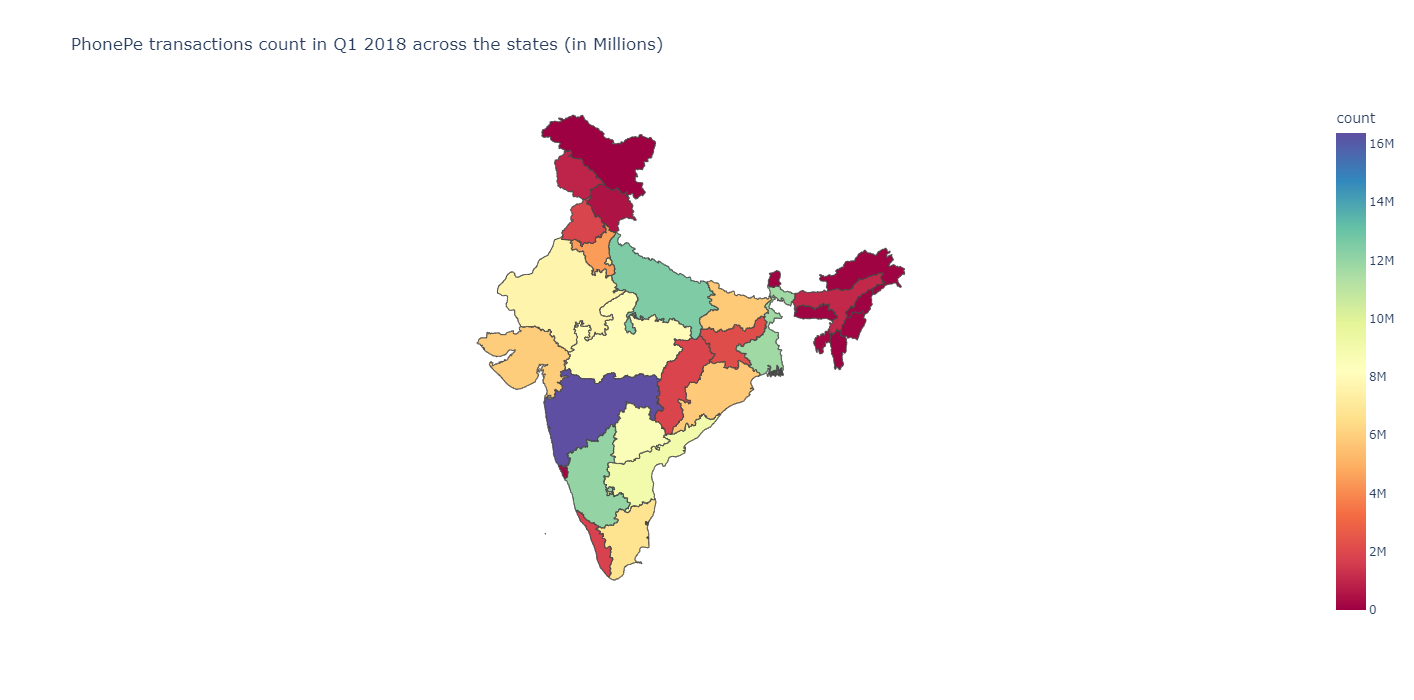

## Maharashtra state ranks 1st with 16.38 Million transactions while Ladakh ranks last with 6089 transactions

In [342]:
fig1 = px.choropleth(result1, geojson=India_states1, featureidkey='properties.ST_NM',   
             locations='name',        
              color= 'amount',  
              color_continuous_scale='viridis',
               title='PhonePe transaction amount in Q1 2018 across the states (in Billions)',  
               height=700,
               projection="mercator"
               )

fig1.update_geos(fitbounds="locations", visible=False)

fig1.show()

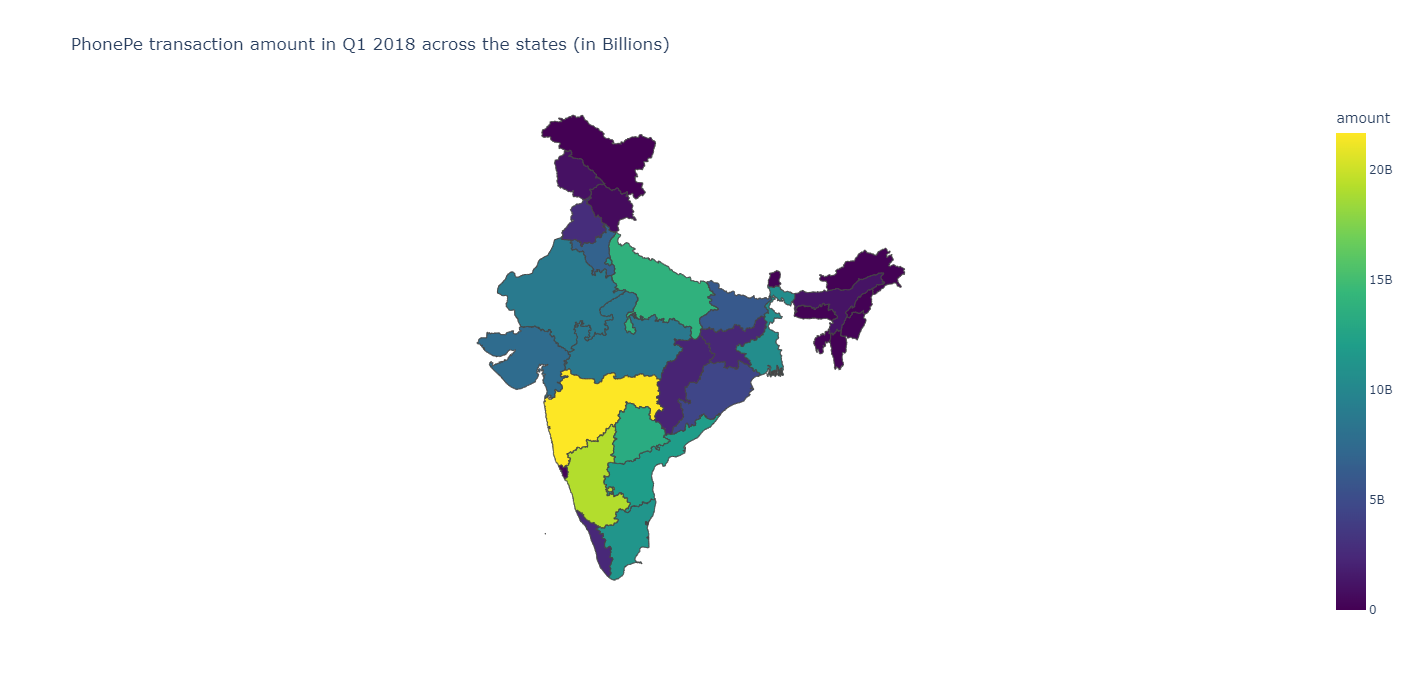

## Maharashtra state ranks 1st with 21.71 Billion transaction amount while Ladakh ranks last with 12.53 Million transaction amount

##Data Visualization - Bar plot for Transaction counts

In [343]:
data1 = pd.DataFrame().assign(States=result['name'], Count_2022=result['count'])
data2 = pd.DataFrame().assign(States=result1['name'], Count_2018=result1['count'])

In [344]:
datab = pd.concat([data1, data2["Count_2018"]], axis=1)
datab

States  Count_2022  Count_2018
0               Puducherry     7359176      104212
1               Tamil Nadu   294573150     6726622
2            Uttar Pradesh   473953246    12537805
3           Madhya Pradesh   472703058     8025395
4           Andhra Pradesh   582603911     9039585
5                  Tripura     2871190      148157
6              Lakshadweep       16397         778
7                  Manipur     5313679       84069
8              Maharashtra  1169506438    16387034
9   Dadra and Nagar Haveli     4802803      148549
10               Meghalaya     1674750       49571
11     Andaman and Nicobar      794748        6658
12                 Haryana   191988609     4480770
13               Rajasthan   564962220     7591690
14                  Ladakh      630015        6089
15                  Punjab    57758302     1870433
16                   Assam    58889886     1056881
17               Jharkhand   110911210     2178921
18                  Odisha   263633499     5809821
19                   Bihar   284390434     5824302
20                  Kerala    95280965     1771380
21               Karnataka  1057855407    12016899
22              Chandigarh     8600491      381895
23               Telangana   886453385     8522766
24        Himachal Pradesh    16088180      481918
25             West Bengal   260505092    11710225
26                 Gujarat   210547146     5948775
27                  Sikkim     1744302       44078
28                Nagaland     1925952       42845
29                 Mizoram      604917       18561
30            Chhattisgarh    97413292     1891514
31         Jammu & Kashmir    16245311      941568
32                     Goa    12214098      160897
33       Arunachal Pradesh     2804068       45497
34                   Delhi   330999861     7122754
35             Uttaranchal    44560772     1246685

In [345]:
datab.set_index('States', inplace=True)
datab

Count_2022  Count_2018
States                                        
Puducherry                 7359176      104212
Tamil Nadu               294573150     6726622
Uttar Pradesh            473953246    12537805
Madhya Pradesh           472703058     8025395
Andhra Pradesh           582603911     9039585
Tripura                    2871190      148157
Lakshadweep                  16397         778
Manipur                    5313679       84069
Maharashtra             1169506438    16387034
Dadra and Nagar Haveli     4802803      148549
Meghalaya                  1674750       49571
Andaman and Nicobar         794748        6658
Haryana                  191988609     4480770
Rajasthan                564962220     7591690
Ladakh                      630015        6089
Punjab                    57758302     1870433
Assam                     58889886     1056881
Jharkhand                110911210     2178921
Odisha                   263633499     5809821
Bihar                    284390434     5824302
Kerala                    95280965     1771380
Karnataka               1057855407    12016899
Chandigarh                 8600491      381895
Telangana                886453385     8522766
Himachal Pradesh          16088180      481918
West Bengal              260505092    11710225
Gujarat                  210547146     5948775
Sikkim                     1744302       44078
Nagaland                   1925952       42845
Mizoram                     604917       18561
Chhattisgarh              97413292     1891514
Jammu & Kashmir           16245311      941568
Goa                       12214098      160897
Arunachal Pradesh          2804068       45497
Delhi                    330999861     7122754
Uttaranchal               44560772     1246685

In [346]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

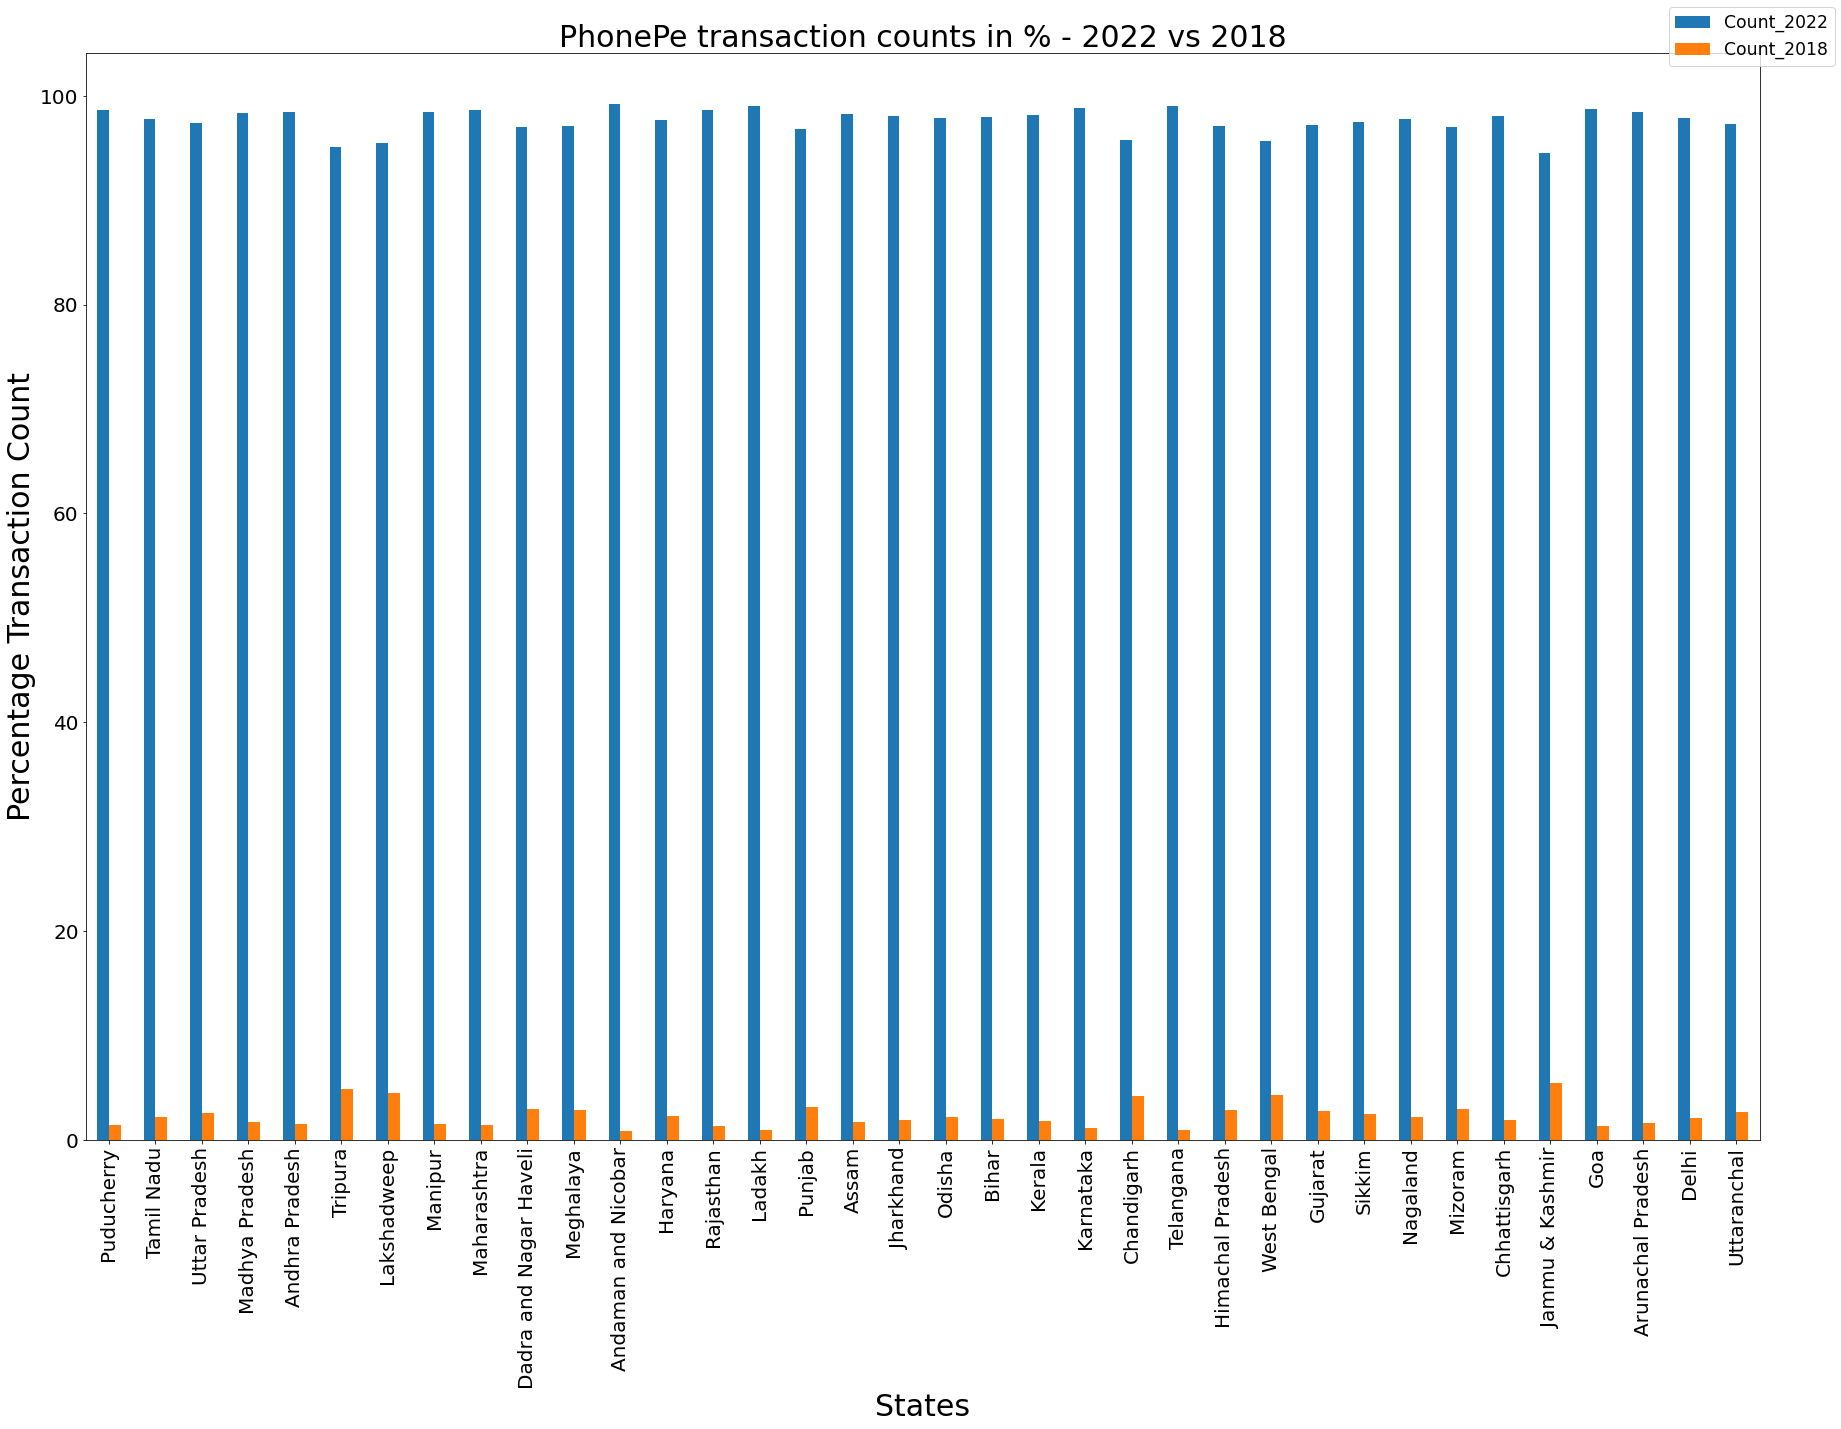

In [347]:
stacked_data = datab.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", figsize=(30, 20))
plt.title("PhonePe transaction counts in % - 2022 vs 2018", size =30)
plt.xlabel("States", size=30)
plt.ylabel("Percentage Transaction Count", size=30)
plt.legend(bbox_to_anchor = (1.05,1.05), loc = 'upper right', fontsize = 'xx-large')
plt.xticks(size = 20)
plt.yticks(size = 20)

## As we can see from above graph that PhonePe transactions have increased 70 - 100 times over the past 5 years i.e. from 2018 to 2022

## Data Visualization - Bar plot for Transaction amounts

In [348]:
data11 = pd.DataFrame().assign(States=result['name'], Amount_2022=result['amount'])
data12 = pd.DataFrame().assign(States=result1['name'], Amount_2018=result1['amount'])

In [349]:
datab2 = pd.concat([data11, data12["Amount_2018"]], axis=1)
datab2

States   Amount_2022   Amount_2018
0               Puducherry  1.208347e+10  1.658260e+08
1               Tamil Nadu  5.127892e+11  1.126156e+10
2            Uttar Pradesh  8.831232e+11  1.393997e+10
3           Madhya Pradesh  7.476651e+11  8.681603e+09
4           Andhra Pradesh  1.294321e+12  1.199628e+10
5                  Tripura  6.247330e+09  1.379789e+08
6              Lakshadweep  5.493943e+07  1.928611e+06
7                  Manipur  1.414450e+10  1.280462e+08
8              Maharashtra  1.681399e+12  2.171161e+10
9   Dadra and Nagar Haveli  6.237048e+09  1.756584e+08
10               Meghalaya  4.662338e+09  6.625026e+07
11     Andaman and Nicobar  2.129030e+09  1.463176e+07
12                 Haryana  3.413040e+11  6.793512e+09
13               Rajasthan  1.022050e+12  8.926293e+09
14                  Ladakh  2.025041e+09  1.253286e+07
15                  Punjab  1.183900e+11  2.780758e+09
16                   Assam  1.322804e+11  1.157804e+09
17               Jharkhand  1.947002e+11  2.374186e+09
18                  Odisha  4.512273e+11  4.627632e+09
19                   Bihar  6.114117e+11  6.045758e+09
20                  Kerala  1.399889e+11  2.402675e+09
21               Karnataka  1.566649e+12  1.921790e+10
22              Chandigarh  1.517499e+10  6.134354e+08
23               Telangana  1.670638e+12  1.330820e+10
24        Himachal Pradesh  2.651845e+10  6.287378e+08
25             West Bengal  5.514267e+11  1.062598e+10
26                 Gujarat  3.925481e+11  7.577982e+09
27                  Sikkim  4.367431e+09  6.465094e+07
28                Nagaland  5.544952e+09  7.800589e+07
29                 Mizoram  1.945159e+09  4.522722e+07
30            Chhattisgarh  1.578470e+11  2.149156e+09
31         Jammu & Kashmir  3.314786e+10  1.005371e+09
32                     Goa  1.981645e+10  3.038567e+08
33       Arunachal Pradesh  7.828092e+09  9.238734e+07
34                   Delhi  5.369649e+11  1.121150e+10
35             Uttaranchal  7.097878e+10  1.508545e+09

In [350]:
datab2.set_index('States', inplace=True)
datab2

Amount_2022   Amount_2018
States                                            
Puducherry              1.208347e+10  1.658260e+08
Tamil Nadu              5.127892e+11  1.126156e+10
Uttar Pradesh           8.831232e+11  1.393997e+10
Madhya Pradesh          7.476651e+11  8.681603e+09
Andhra Pradesh          1.294321e+12  1.199628e+10
Tripura                 6.247330e+09  1.379789e+08
Lakshadweep             5.493943e+07  1.928611e+06
Manipur                 1.414450e+10  1.280462e+08
Maharashtra             1.681399e+12  2.171161e+10
Dadra and Nagar Haveli  6.237048e+09  1.756584e+08
Meghalaya               4.662338e+09  6.625026e+07
Andaman and Nicobar     2.129030e+09  1.463176e+07
Haryana                 3.413040e+11  6.793512e+09
Rajasthan               1.022050e+12  8.926293e+09
Ladakh                  2.025041e+09  1.253286e+07
Punjab                  1.183900e+11  2.780758e+09
Assam                   1.322804e+11  1.157804e+09
Jharkhand               1.947002e+11  2.374186e+09
Odisha                  4.512273e+11  4.627632e+09
Bihar                   6.114117e+11  6.045758e+09
Kerala                  1.399889e+11  2.402675e+09
Karnataka               1.566649e+12  1.921790e+10
Chandigarh              1.517499e+10  6.134354e+08
Telangana               1.670638e+12  1.330820e+10
Himachal Pradesh        2.651845e+10  6.287378e+08
West Bengal             5.514267e+11  1.062598e+10
Gujarat                 3.925481e+11  7.577982e+09
Sikkim                  4.367431e+09  6.465094e+07
Nagaland                5.544952e+09  7.800589e+07
Mizoram                 1.945159e+09  4.522722e+07
Chhattisgarh            1.578470e+11  2.149156e+09
Jammu & Kashmir         3.314786e+10  1.005371e+09
Goa                     1.981645e+10  3.038567e+08
Arunachal Pradesh       7.828092e+09  9.238734e+07
Delhi                   5.369649e+11  1.121150e+10
Uttaranchal             7.097878e+10  1.508545e+09

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

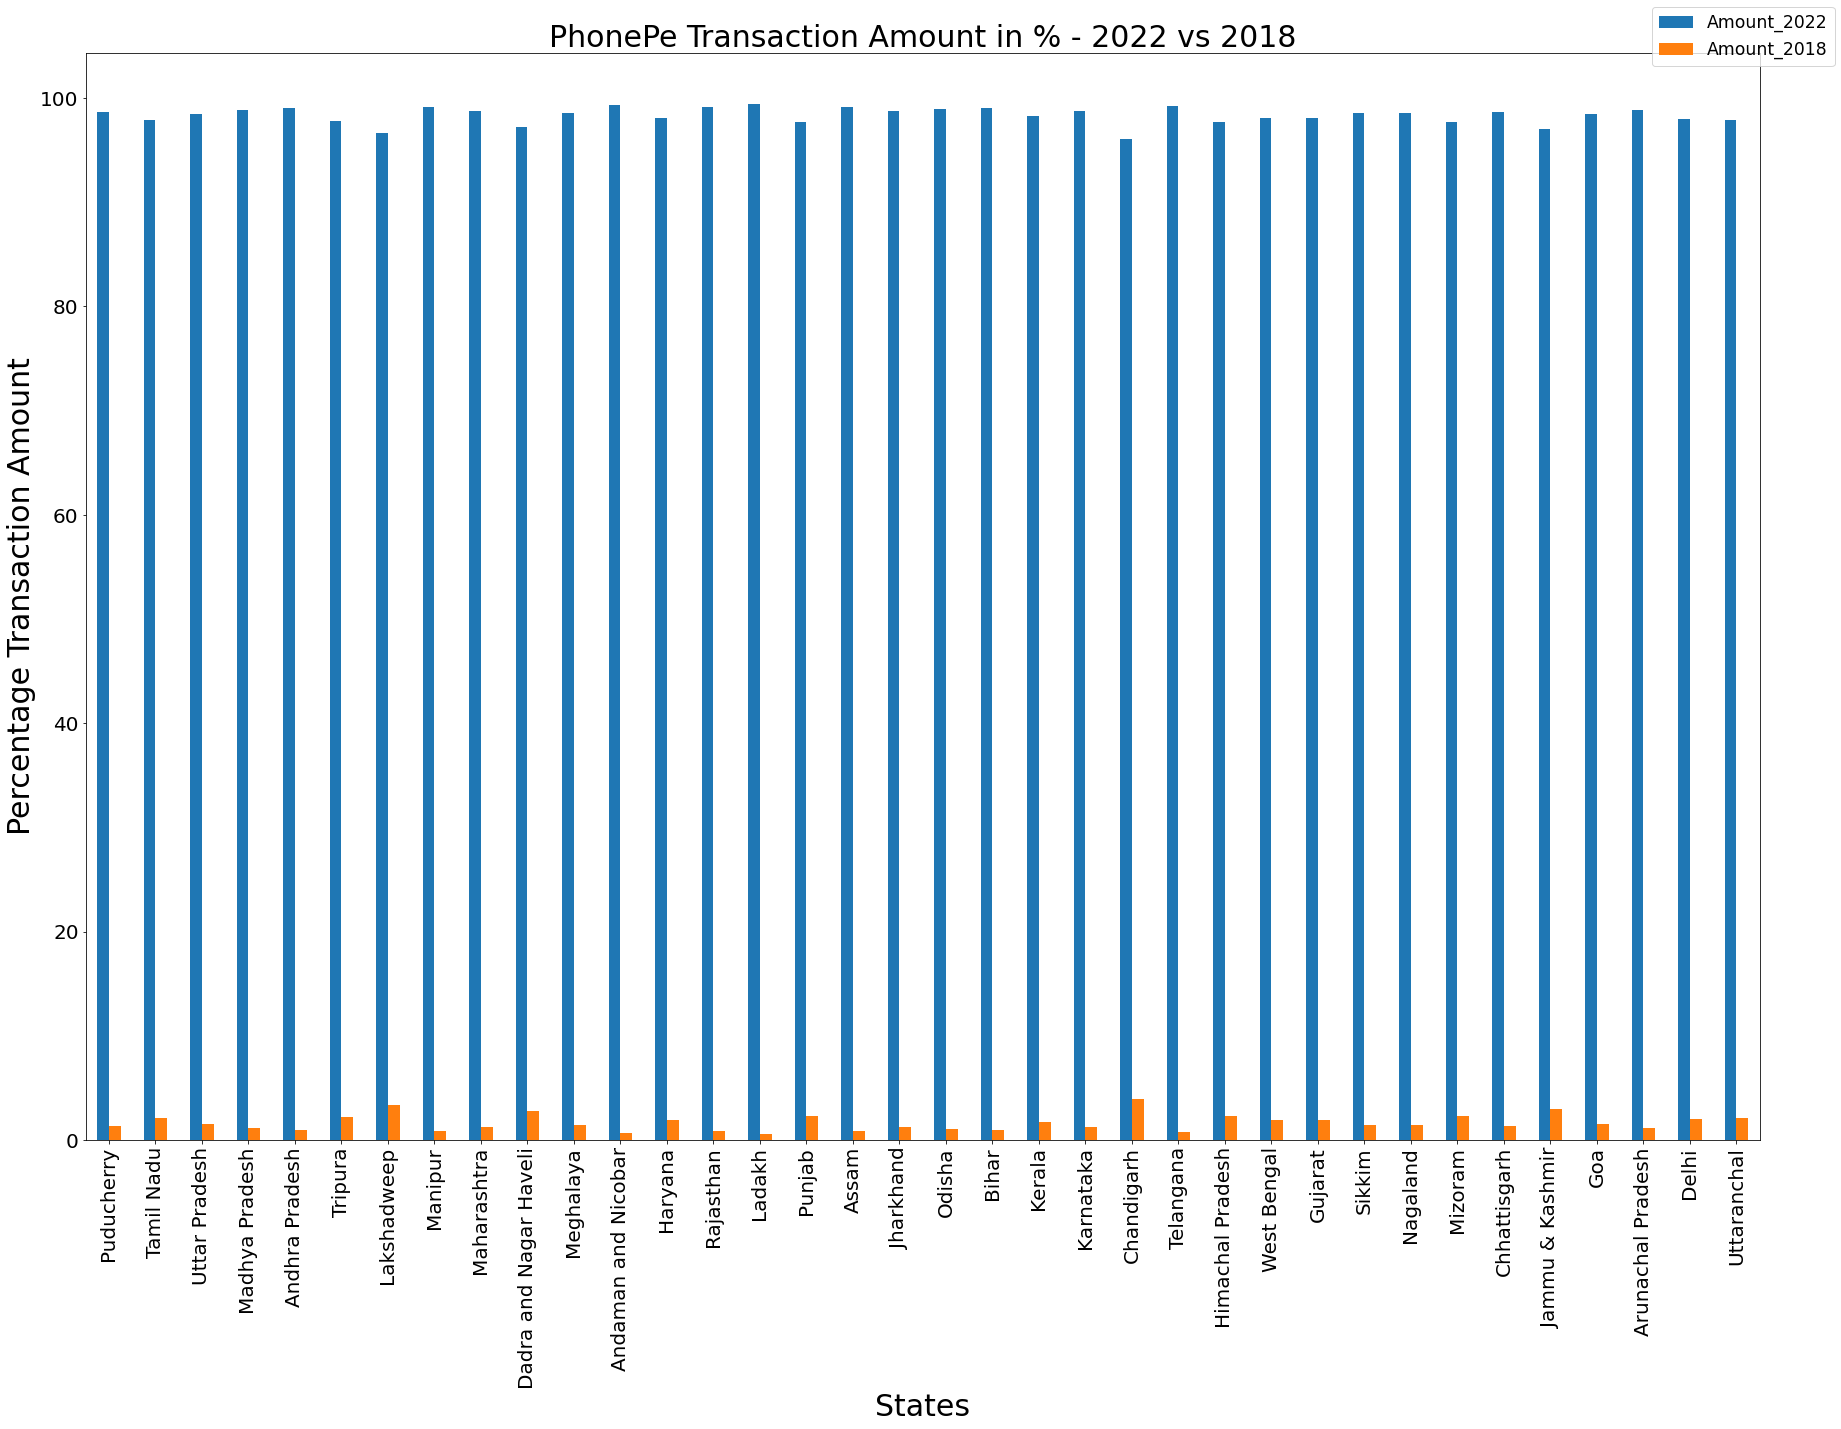

In [351]:
stacked_data2 = datab2.apply(lambda x: x*100/sum(x), axis=1)
stacked_data2.plot(kind="bar", figsize=(30, 20))
plt.title("PhonePe Transaction Amount in % - 2022 vs 2018", size =30)
plt.xlabel("States", size=30)
plt.ylabel("Percentage Transaction Amount", size=30)
plt.legend(bbox_to_anchor = (1.05,1.05), loc = 'upper right', fontsize = 'xx-large')
plt.xticks(size = 20)
plt.yticks(size = 20)

## As we can see from above graph that PhonePe Transaction amounts have increased 70 - 150 times over the past 5 years i.e. from 2018 to 2022